In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
plt.close('all')

In [ ]:
#Definición de estados
N=15 #Número de entrevistas
M=15 #Número de niveles de calidad de la entrevistada
#prob=np.exp(-0.1*np.arange(M)) #Decreciente
prob=np.ones(M)
prob=prob/prob.sum()
ProbAcum=np.cumsum(prob)
#plt.plot(prob)

def mover(s,acc):
  n,m,seleccion, maximo=s
  mn=np.min(np.where(np.random.rand()<=ProbAcum)) #Nuevo nivel, de acuerdo con la distribución de probabilidad
  maximo_n=max(maximo, m)

  if(seleccion==-1): #Aún no se ha decidido por nadie
    if(n==N-1): #Es el último día, tiene que contratar
      sn=('fin')
      reward=m
      done=True
      if(maximo>m):
        reward-=(maximo-m)
    else:
      if(acc==0): #La decisión es no contratar
        sn=(n+1, mn, -1, maximo_n)
        reward=0
        done=False
      else: #La acción es sí contratar
        sn=(n+1, mn, m, maximo_n) #Se refleja que se hizo la contratación
        reward=m
        if(maximo>m):
          reward-=(maximo-m)
        done=False
  else: #Quiere decir que ya se había elegido previamente
    reward=0
    if(m>seleccion):
      reward=seleccion-m #Se penaliza
    if(n==N-1): #Es el último día, ya el siguiente es el final
      sn=('fin')
      done=True
    else:
      sn=(n+1, mn, seleccion, maximo_n)
      done=False
  return sn, reward, done

 Episodio: 499960, Recompensa del episodio: 11.0, eps=0.031

 Episodio: 500000, Recompensa del episodio: -1.0, eps=0.031

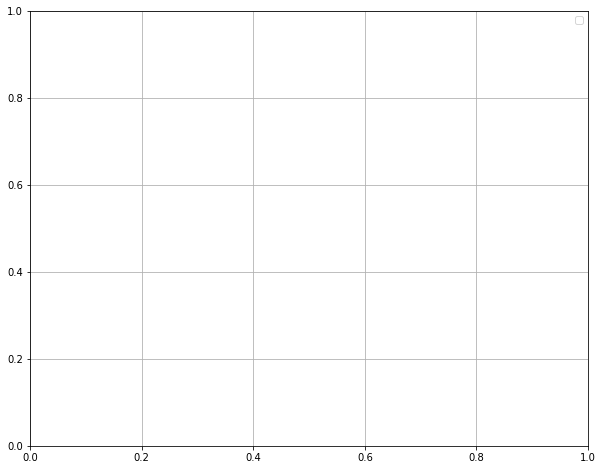

In [ ]:
#Entrenamiento utilizando Q-learning
Q = defaultdict(lambda: np.zeros(2)) #Matriz Q de estados.
epochs=500005
K=-2/epochs*np.log(0.25)
gamma=0.7
alfa=0.7
eps=0.5
recompensas=[]
plt.figure(figsize=(10,8))
for i in range(epochs):
  n=0 #Día inicial
  m=np.min(np.where(np.random.rand()<=ProbAcum)) #Generación del valor de m aleatorio
  seleccion=-1
  maximo=m
  s=(n,m,seleccion, maximo)
  #print(s)
  vm=[m]
  vsel=(0,-1)
  vs=[s]
  done=False
  recompensa=0
  while(not(done)):
    eo=eps*np.exp(-i*K)
    if(np.random.rand()<eo): #Se elige una acción aleatoria completamente
      acc=np.random.randint(2) #Un número entre 0 y 1
    else:
      acc=np.argmax(Q[s]) #Se selecciona la mejor de las dos opciones
    sn,rw,done=mover(s,acc)
    vs.append(sn)
    if(acc==1 and vsel[1]==-1):
      vsel=(s[0],sn[2])
    if(sn!='fin'):
      vm.append(sn[1])
    #print(sn)
    recompensa+=rw
    #Proceso como tal de q-learning
    Q[s][acc]=Q[s][acc]+alfa*(rw+gamma*np.max(Q[sn])-Q[s][acc])
    s=sn

  recompensas.append(recompensa)
  if(i%40==0):
    print('\r Episodio: {}, Recompensa del episodio: {:.1f}, eps={:.3f}'.format(i,recompensa,eo), end="")
  #if(i in ver):
  #  plt.plot(vm, label='Iteracion: '+str(i))
  #  plt.plot(vsel[0], vsel[1], '*')#,label='Selección en la Iteracion: '+str(i))
plt.grid()


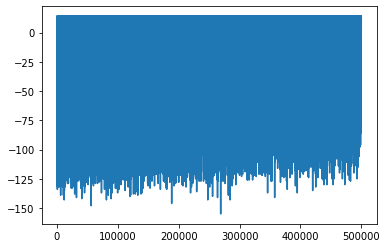

In [ ]:
plt.figure()
plt.plot(recompensas)

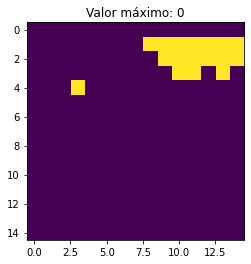

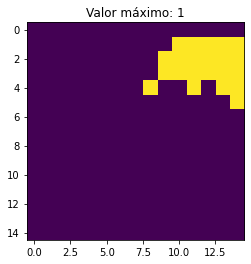

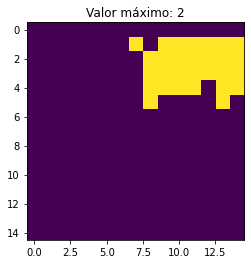

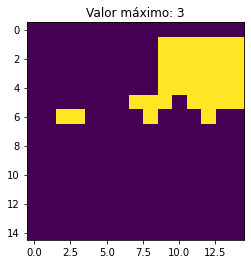

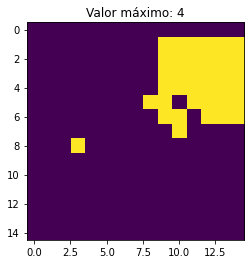

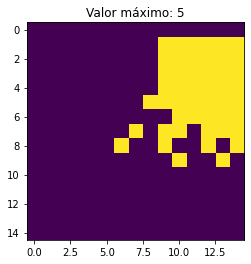

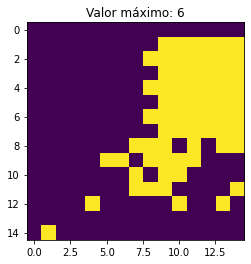

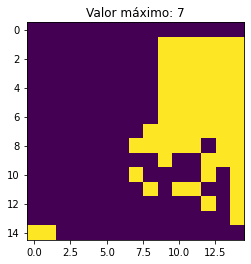

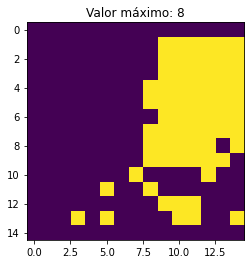

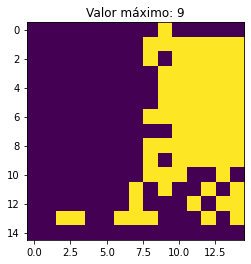

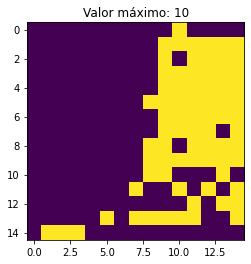

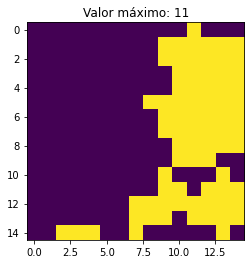

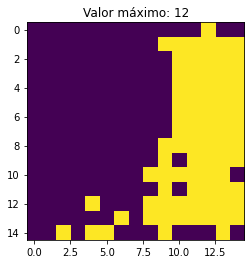

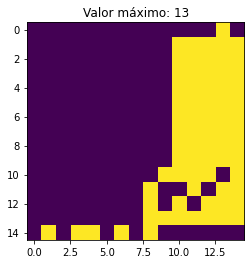

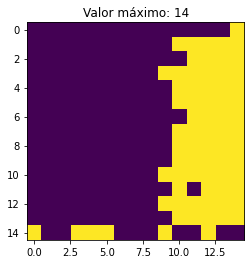

In [ ]:
V=np.zeros((N,M,M))
Pi=np.zeros_like(V)
for key, val in Q.items():
  if(key!='fin'):
    n,m,sel,maximo=key
    if(sel==-1):
      V[n,m,maximo]=np.max(val)
      Pi[n,m,maximo]=np.argmax(val)
for i in range(M):
  plt.figure()
  plt.imshow(np.squeeze(Pi[:,:,i]))
  plt.title('Valor máximo: '+str(i))